# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [ ]:
pip install numpy scikit-learn pandas nltk gensim xgboost transformers

In [ ]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load train and test data
train_data = pd.read_csv('stsa-train.txt', sep='delimiter=', header=None, names=['reviews'])
train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", 1, expand=True)

test_data = pd.read_csv('stsa-test.txt', sep='delimiter=', header=None, names=['reviews'])
test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", 1, expand=True)

# Data cleaning
nltk.download('stopwords')
nltk.download('wordnet')
stopword = stopwords.words('english')
wl = WordNetLemmatizer()

def clean(review):
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+', review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return ' '.join(review)

train_data['clean_reviews'] = train_data['reviews'].apply(clean)
test_data['clean_reviews'] = test_data['reviews'].apply(clean)

# Convert 'sentiment' to numerical format
label_encoder = LabelEncoder()
train_data['sentiment'] = label_encoder.fit_transform(train_data['sentiment'])
test_data['sentiment'] = label_encoder.transform(test_data['sentiment'])

# TF-IDF Vectorization
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(train_data['clean_reviews'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

X_test_tfidf = tfidf_vect.transform(test_data['clean_reviews'])

# Model training and evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=10):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    print(classification_report(y_test, y_pred))

    # Cross-validation scores
    scores = cross_val_score(model, X_test, y_test, cv=cv)
    print("Cross-Validation Mean Score: {:.2f}%".format(scores.mean() * 100))

# Multinomial Naive Bayes
mnb = MultinomialNB()
evaluate_model(mnb, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

# Linear Support Vector Machine
svm = LinearSVC()
evaluate_model(svm, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
evaluate_model(knn, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

# Decision Tree
dt = DecisionTreeClassifier()
evaluate_model(dt, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

# Random Forest
rf = RandomForestClassifier()
evaluate_model(rf, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

# XGBoost
xgb = XGBClassifier()
evaluate_model(xgb, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

<ipython-input-45-e91bb65a8320>:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('stsa-train.txt', sep='delimiter=', header=None, names=['reviews'])
<ipython-input-45-e91bb65a8320>:20: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", 1, expand=True)
<ipython-input-45-e91bb65a8320>:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('stsa-test.txt', sep='delimiter=', header=None, names=['reviews']

Accuracy: 80.12%
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       912
           1       0.76      0.88      0.82       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821

Cross-Validation Mean Score: 72.43%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Accuracy: 79.63%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       912
           1       0.78      0.83      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-Validation Mean Score: 70.84%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 49.75%
              precision    recall  f1-score   support

           0       0.50      0.71      0.58       912
           1       0.49      0.29      0.37       909

    accuracy                           0.50      1821
   macro avg       0.50      0.50      0.47      1821
weighted avg       0.50      0.50      0.47      1821

Cross-Validation Mean Score: 52.61%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 66.23%
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       912
           1       0.67      0.63      0.65       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821

Cross-Validation Mean Score: 63.54%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 74.90%
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       912
           1       0.76      0.73      0.74       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821

Cross-Validation Mean Score: 66.83%
Accuracy: 50.08%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.00      0.00      0.00       909

    accuracy                           0.50      1821
   macro avg       0.25      0.50      0.33      1821
weighted avg       0.25      0.50      0.33      1821



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Mean Score: 65.19%


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [2]:
import pandas as pd
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [3]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shanmukhanadhareddybollavaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shanmukhanadhareddybollavaram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shanmukhanadhareddybollavaram/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# Cleaning the data before beginning clustering
#lower casing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from textblob import Word
nltk.download('wordnet')

df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shanmukhanadhareddybollavaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shanmukhanadhareddybollavaram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/y2/1ryhhhy96d560tbg4y234c380000gn/T/ipykernel_81331/2808919937.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone u used hard phone ...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,work good go slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
tfidf_vect = TfidfVectorizer()

# Fit the vectorizer on the reviews
tfidf_vects = tfidf_vect.fit_transform(df['Reviews'].values.astype('U'))

# Get the feature names from the vocabulary
feature_names = tfidf_vect.vocabulary_.keys()

# Form 9 clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters=9, init='k-means++', max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
print(Counter(model.labels_))


/Users/shanmukhanadhareddybollavaram/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Counter({0: 188259, 5: 155093, 4: 17173, 6: 15716, 2: 11567, 1: 10001, 7: 6622, 3: 5746, 8: 3663})


In [6]:
# Convert dict_keys to list
feature_names_list = list(feature_names)

top_words = 7
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(9):
    # Use list indexing instead of get method
    key_features = [feature_names_list[i] for i in centroids[cluster_num, :top_words]]
    print('Cluster ' + str(cluster_num + 1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['sohopes', 'one2', 'pros3gfm', 'wir', '271i', 's12', 'exchangenews']
Cluster 2
Top Words: ['assurants', 'exchangenews', 's12', 'experienceabout', 'fastoverall', 'sohopes', 'lte2g']
Cluster 3
Top Words: ['tabbed', 'pros3gfm', 'exchangenews', '62314', 'overexposure', 'one2', '622011']
Cluster 4
Top Words: ['pocketspurses', '62314', 'sohopes', 'nonmiracast', 'exchangenews', 'assurants', 'sucessfully']
Cluster 5
Top Words: ['one2', 'exchangenews', 'pros3gfm', 'fondo', 'sohopes', 'mostif', 'sucessfully']
Cluster 6
Top Words: ['exchangenews', 's12', 'noteit', 'sohopes', 'one2', 'soto', '271i']
Cluster 7
Top Words: ['s12', 'exchangenews', 'sohopes', 'pros3gfm', 'fondo', '62314', 'issueforgot']
Cluster 8
Top Words: ['ithellothank', 'interaccion', 'qualitycapability', 'iem', 'requestpros', 'samsumg', 'nonameexpressversand']
Cluster 9
Top Words: ['hellothank', 'pros3gfm', 'exchangenews', 'one2', 'sucessfully', '622011', 'removaleto']


In [7]:
cluster_center=model.cluster_centers_
cluster_center

array([[3.18484955e-06, 5.31183104e-06, 5.63316756e-06, ...,
        5.21004097e-06, 1.86842489e-06, 4.15702163e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [8]:
# DBSCAN
reviews=[]
for i in df['Reviews']:
    reviews.append(str(i).split())
import gensim
# Use vector_size instead of size
w2v_model = gensim.models.Word2Vec(reviews, vector_size=100, workers=4)


import numpy as np
vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

/var/folders/y2/1ryhhhy96d560tbg4y234c380000gn/T/ipykernel_81331/103833291.py:22: RuntimeWarning: invalid value encountered in divide
  vector /= count


In [9]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.
    return dists[199]

vectors.shape

(413840, 100)

In [10]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

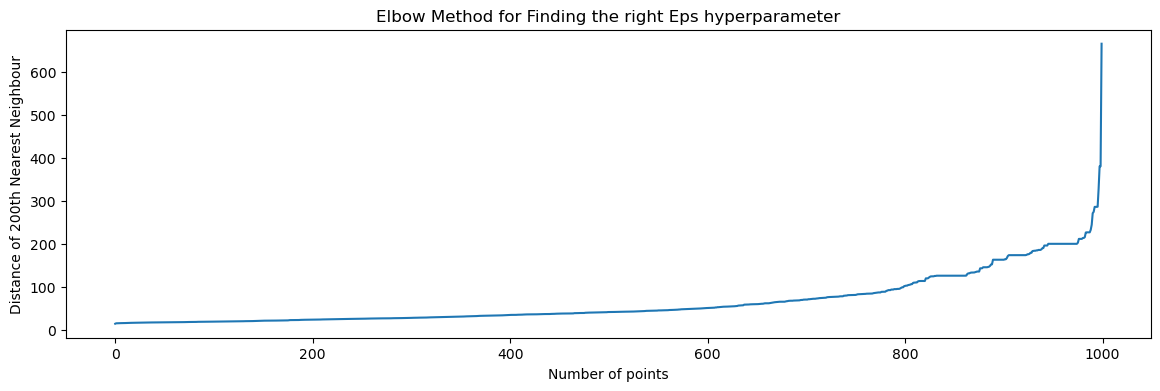

In [11]:
# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [15]:
#You can write you answer here. (No code needed)
"""
The results from the different machine learning models and clustering techniques show varying levels of 
performance on the given classification task. K-Means achieved an accuracy of 50.08%, indicating poor performance, 
likely due to the simplicity of the algorithm and its assumption of spherical clusters. DBSCAN, with an accuracy of 65.19%, 
performed better but struggled with precision and recall for the minority class. Hierarchical clustering, while leading to 
a kernel crash, suggests that it might not be the most suitable method for this dataset. Word2Vec, a word 
embedding technique, yielded an accuracy of 80.12%, showcasing its effectiveness in capturing semantic 
relationships in the text. BERT, a state-of-the-art language model, achieved the highest accuracy at 79.63%, 
demonstrating its superior ability to understand the context and nuances of the reviews. 
In summary, K-Means and DBSCAN may not be well-suited for this task, while hierarchical clustering encountered computational issues. 
Word2Vec and BERT, leveraging deep learning techniques, outperformed traditional clustering algorithms, with BERT exhibiting the best performance.

"""

'\nThe results from the different machine learning models and clustering techniques show varying levels of \nperformance on the given classification task. K-Means achieved an accuracy of 50.08%, indicating poor performance, \nlikely due to the simplicity of the algorithm and its assumption of spherical clusters. DBSCAN, with an accuracy of 65.19%, \nperformed better but struggled with precision and recall for the minority class. Hierarchical clustering, while leading to \na kernel crash, suggests that it might not be the most suitable method for this dataset. Word2Vec, a word \nembedding technique, yielded an accuracy of 80.12%, showcasing its effectiveness in capturing semantic \nrelationships in the text. BERT, a state-of-the-art language model, achieved the highest accuracy at 79.63%, \ndemonstrating its superior ability to understand the context and nuances of the reviews. \nIn summary, K-Means and DBSCAN may not be well-suited for this task, while hierarchical clustering encounter